Objective: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [47]:
"""
Created on 13th Aug 2020
@author: Shilpa Chavan
Algorithm : Neural Network Algorithm
Dataset : forestfires.csv
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [3]:
forest = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Neural Network\\forestfires.csv")

In [4]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Exploratory data analysis

In [5]:
forest['size_category'].unique()

array(['small', 'large'], dtype=object)

In [6]:
forest['size_category'] = forest['size_category'].map({'small': 0,'large': 1})
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
forest.drop(["month","day"], axis = 1,inplace = True)

In [21]:
forest.isnull().sum() # No missing values

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

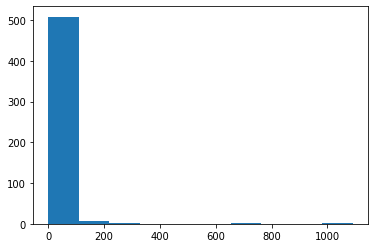

In [24]:
X = forest.drop(['area'],axis=1)
Y = forest['area']
Y
plt.hist(Y)
forest.area.value_counts()

In [25]:
forest.astype(int)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86,26,94,5,8,51,6,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,90,35,669,6,18,33,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,90,43,686,6,14,33,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,91,33,77,9,8,97,4,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,89,51,102,9,11,99,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81,56,665,1,27,32,2,0,6,0,...,0,0,0,0,0,0,0,0,0,1
513,81,56,665,1,21,71,5,0,54,0,...,0,0,0,0,0,0,0,0,0,1
514,81,56,665,1,21,70,6,0,11,0,...,0,0,0,0,0,0,0,0,0,1
515,94,146,614,11,25,42,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training and Test dataset

In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:

Xtrain=X_train.astype(int)
Xtest=X_test.astype(int)
ytrain=y_train.astype(int)
ytest=y_test.astype(int)

# Model Training and Evaluation

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30))


mlp.fit(Xtrain,ytrain)
prediction_train=mlp.predict(Xtrain)
prediction_test = mlp.predict(Xtest)
prediction_test

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([ 9,  0,  3,  6,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  6,  0,  0,
        3,  0,  0,  0,  0,  0,  0,  0,  9,  0,  2,  0,  0,  0,  0,  0, 13,
       11,  0,  7,  0,  5,  7,  0,  0,  0,  0,  7, 13,  0,  8,  0,  8,  0,
        0,  0,  0,  6,  0,  0,  0,  8,  0, 11,  0,  0,  0, 10,  0,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  7,  0,  0,  9,  0,  6,  3,  0,
       12,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0])

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,prediction_test))
np.mean(ytest==prediction_test)
np.mean(ytrain==prediction_train)


[[75  0  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 6  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  1  0  0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  1  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

0.6666666666666666

In [36]:
np.mean(ytest==prediction_test)

0.5846153846153846

In [20]:
!pip install nnv

# Visualization

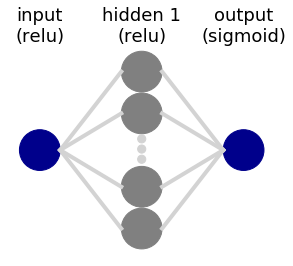

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cafc780ac8>)

In [21]:
from nnv import NNV

layersList = [
    {"title":"input\n(relu)", "units": 1, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)", "units": 30},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render(save_to_file="my_example.png")

In [40]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=400, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)

Iteration 1, loss = 4.16863703
Iteration 2, loss = 4.15723538
Iteration 3, loss = 4.13984635
Iteration 4, loss = 4.11776054
Iteration 5, loss = 4.09121268
Iteration 6, loss = 4.06247789
Iteration 7, loss = 4.03119215
Iteration 8, loss = 3.99911394
Iteration 9, loss = 3.96449466
Iteration 10, loss = 3.92798135
Iteration 11, loss = 3.89171154
Iteration 12, loss = 3.85398113
Iteration 13, loss = 3.81481285
Iteration 14, loss = 3.77615890
Iteration 15, loss = 3.73595595
Iteration 16, loss = 3.69462338
Iteration 17, loss = 3.65377833
Iteration 18, loss = 3.61186483
Iteration 19, loss = 3.56837946
Iteration 20, loss = 3.52415813
Iteration 21, loss = 3.48088712
Iteration 22, loss = 3.43564109
Iteration 23, loss = 3.39031148
Iteration 24, loss = 3.34398317
Iteration 25, loss = 3.29684801
Iteration 26, loss = 3.25279855
Iteration 27, loss = 3.20725525
Iteration 28, loss = 3.16132607
Iteration 29, loss = 3.11958787
Iteration 30, loss = 3.07567255
Iteration 31, loss = 3.03554224
Iteration 32, los

Iteration 255, loss = 2.12941487
Iteration 256, loss = 2.12791091
Iteration 257, loss = 2.12639442
Iteration 258, loss = 2.12490815
Iteration 259, loss = 2.12335461
Iteration 260, loss = 2.12186089
Iteration 261, loss = 2.12038184
Iteration 262, loss = 2.11890158
Iteration 263, loss = 2.11739434
Iteration 264, loss = 2.11588735
Iteration 265, loss = 2.11437832
Iteration 266, loss = 2.11305021
Iteration 267, loss = 2.11148885
Iteration 268, loss = 2.10991794
Iteration 269, loss = 2.10848155
Iteration 270, loss = 2.10700941
Iteration 271, loss = 2.10555598
Iteration 272, loss = 2.10407947
Iteration 273, loss = 2.10263119
Iteration 274, loss = 2.10116393
Iteration 275, loss = 2.09973525
Iteration 276, loss = 2.09830867
Iteration 277, loss = 2.09689381
Iteration 278, loss = 2.09539730
Iteration 279, loss = 2.09405630
Iteration 280, loss = 2.09256894
Iteration 281, loss = 2.09109696
Iteration 282, loss = 2.08977394
Iteration 283, loss = 2.08840429
Iteration 284, loss = 2.08686104
Iteration 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.6

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[78,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 